In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

import matplotlib.pyplot as plt


In [2]:
#Fetch Images count from Fodlers

In [3]:
count = 0 
dirs = os.listdir('ML24_FLOWERS_IMAGES/')
for dir in dirs:
    files = list(os.listdir('ML24_FLOWERS_IMAGES/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

aster Folder has 712 Images
astilbe Folder has 737 Images
bellflower Folder has 873 Images
black_eyed_susan Folder has 1000 Images
calendula Folder has 978 Images
california_poppy Folder has 1022 Images
carnation Folder has 923 Images
coreopsis Folder has 1047 Images
daffodil Folder has 627 Images
dahlia Folder has 864 Images
daisy Folder has 764 Images
dandelion Folder has 1052 Images
iris Folder has 886 Images
lotus Folder has 1000 Images
magnolia Folder has 1048 Images
orchid Folder has 762 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
water_lily Folder has 982 Images
Images Folder has 17778 Images


In [4]:
#Load Images into Arrays as Dataset

In [5]:
base_dir = 'ML24_FLOWERS_IMAGES/'
img_size = 180
batch = 32

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 17778 files belonging to 20 classes.
Using 14223 files for training.
Found 17778 files belonging to 20 classes.
Using 3555 files for validation.


In [7]:
flower_names = train_ds.class_names
flower_names

['aster',
 'astilbe',
 'bellflower',
 'black_eyed_susan',
 'calendula',
 'california_poppy',
 'carnation',
 'coreopsis',
 'daffodil',
 'dahlia',
 'daisy',
 'dandelion',
 'iris',
 'lotus',
 'magnolia',
 'orchid',
 'rose',
 'sunflower',
 'tulip',
 'water_lily']

In [ ]:
for images, labels in train_ds.take(1):
    print("First batch of labels:", labels.numpy())  # Numeric labels
    print("Corresponding class names:", [flower_names[label] for label in labels.numpy()])

First batch of labels: [12  6  8 15  7  4 12 12 11  7  3 18 11  4 17 12  2 14  5 19  5  0  6  1
  8 11 15  2 14 16  1  3]
Corresponding class names: ['iris', 'carnation', 'daffodil', 'orchid', 'coreopsis', 'calendula', 'iris', 'iris', 'dandelion', 'coreopsis', 'black_eyed_susan', 'tulip', 'dandelion', 'calendula', 'sunflower', 'iris', 'bellflower', 'magnolia', 'california_poppy', 'water_lily', 'california_poppy', 'aster', 'carnation', 'astilbe', 'daffodil', 'dandelion', 'orchid', 'bellflower', 'magnolia', 'rose', 'astilbe', 'black_eyed_susan']


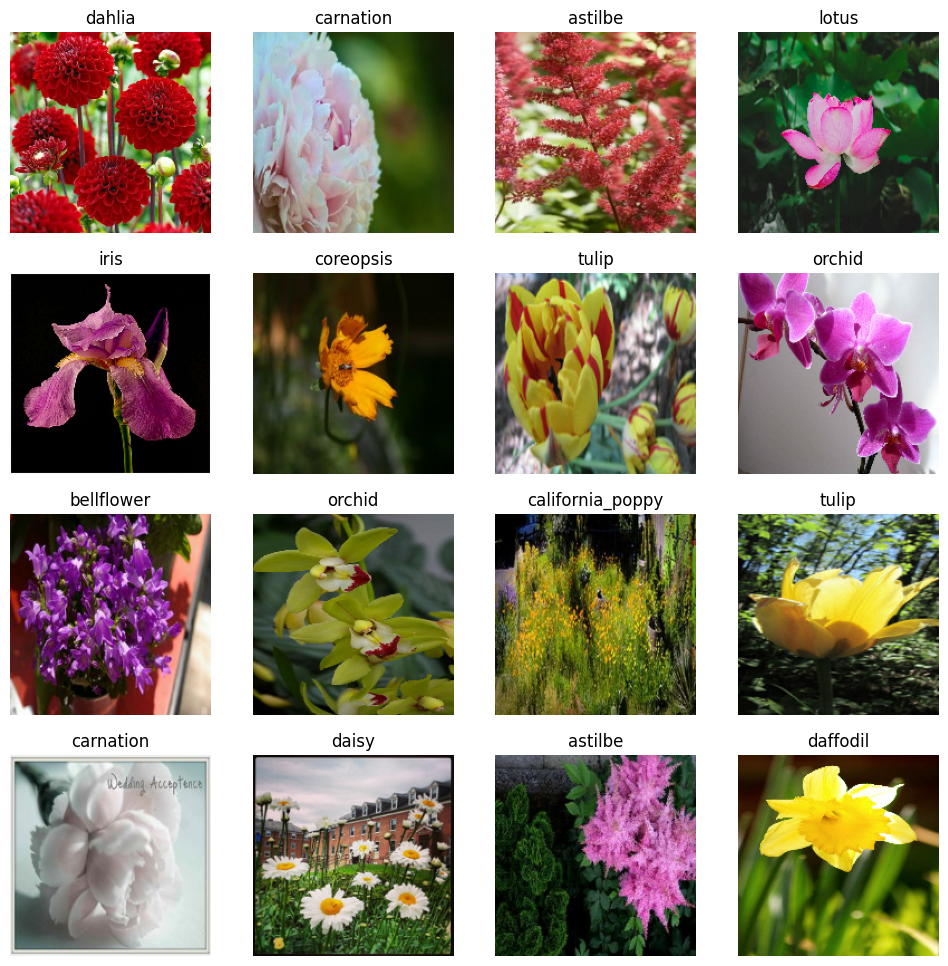

In [9]:
i = 0
plt.figure(figsize=(12,12))

for images, labels in train_ds.take(1):
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [12]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [13]:
#Data Augmentation

In [14]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

c:\Users\PC-CCR\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


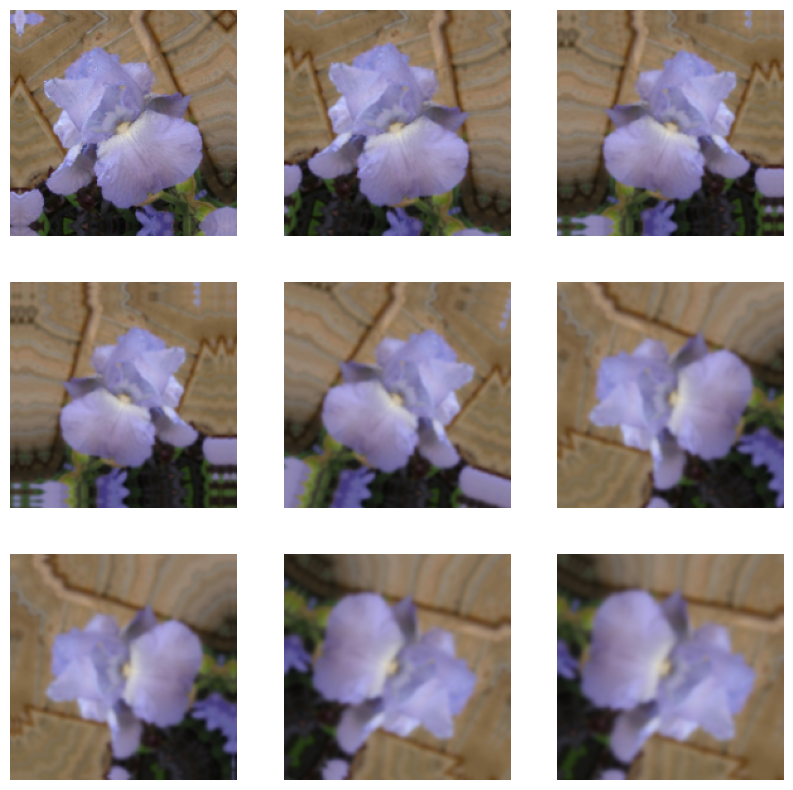

In [15]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [16]:
#Model Creation

In [18]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(20)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,991,220 (15.23 MB)

 Trainable params: 3,991,220 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
445/445 ━━━━━━━━━━━━━━━━━━━━ 1105s 2s/step - accuracy: 0.2443 - loss: 2.3257 - val_accuracy: 0.4329 - val_loss: 1.7768
Epoch 2/15
445/445 ━━━━━━━━━━━━━━━━━━━━ 1083s 2s/step - accuracy: 0.4391 - loss: 1.7256 - val_accuracy: 0.4875 - val_loss: 1.6526
Epoch 3/15
445/445 ━━━━━━━━━━━━━━━━━━━━ 2095s 5s/step - accuracy: 0.5025 - loss: 1.5144 - val_accuracy: 0.5443 - val_loss: 1.4340
Epoch 4/15
445/445 ━━━━━━━━━━━━━━━━━━━━ 1320s 3s/step - accuracy: 0.5605 - loss: 1.3522 - val_accuracy: 0.5463 - val_loss: 1.4441
Epoch 5/15
445/445 ━━━━━━━━━━━━━━━━━━━━ 1023s 2s/step - accuracy: 0.5933 - loss: 1.2430 - val_accuracy: 0.5752 - val_loss: 1.3532
Epoch 6/15
445/445 ━━━━━━━━━━━━━━━━━━━━ 1032s 2s/step - accuracy: 0.6226 - loss: 1.1708 - val_accuracy: 0.5513 - val_loss: 1.4583
Epoch 7/15
445/445 ━━━━━━━━━━━━━━━━━━━━ 1065s 2s/step - accuracy: 0.6331 - loss: 1.1187 - val_accuracy: 0.5615 - val_loss: 1.4678
Epoch 8/15
445/445 ━━━━━━━━━━━━━━━━━━━━ 1232s 3s/step - accuracy: 0.6627 - loss: 1.0295 - 

In [ ]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [ ]:
classify_images('SAMPLES/roseblub.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'The Image belongs to rose with a score of 88.904884'

In [ ]:
model.save('Flower_Recog_Model.h5')